<a href="https://colab.research.google.com/github/phsphd/Stock-Prediction-Models/blob/master/XGBoost_in_SPY_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install matplotlib
!pip install xgboost

[*********************100%%**********************]  1 of 1 completed


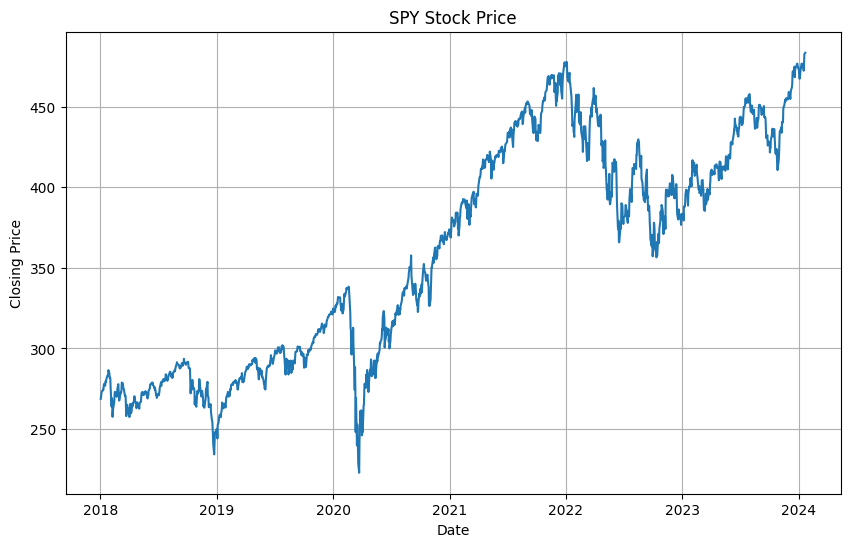

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Downloading the data
ticker = "SPY"
start_date = "2018-01-01"
end_date = "2024-01-23"
data = yf.download(ticker, start=start_date, end=end_date)

# Plotting the closing price
plt.figure(figsize=(10, 6))
plt.plot(data["Close"])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{ticker} Stock Price")
plt.grid(True)

plt.show()

[*********************100%%**********************]  1 of 1 completed


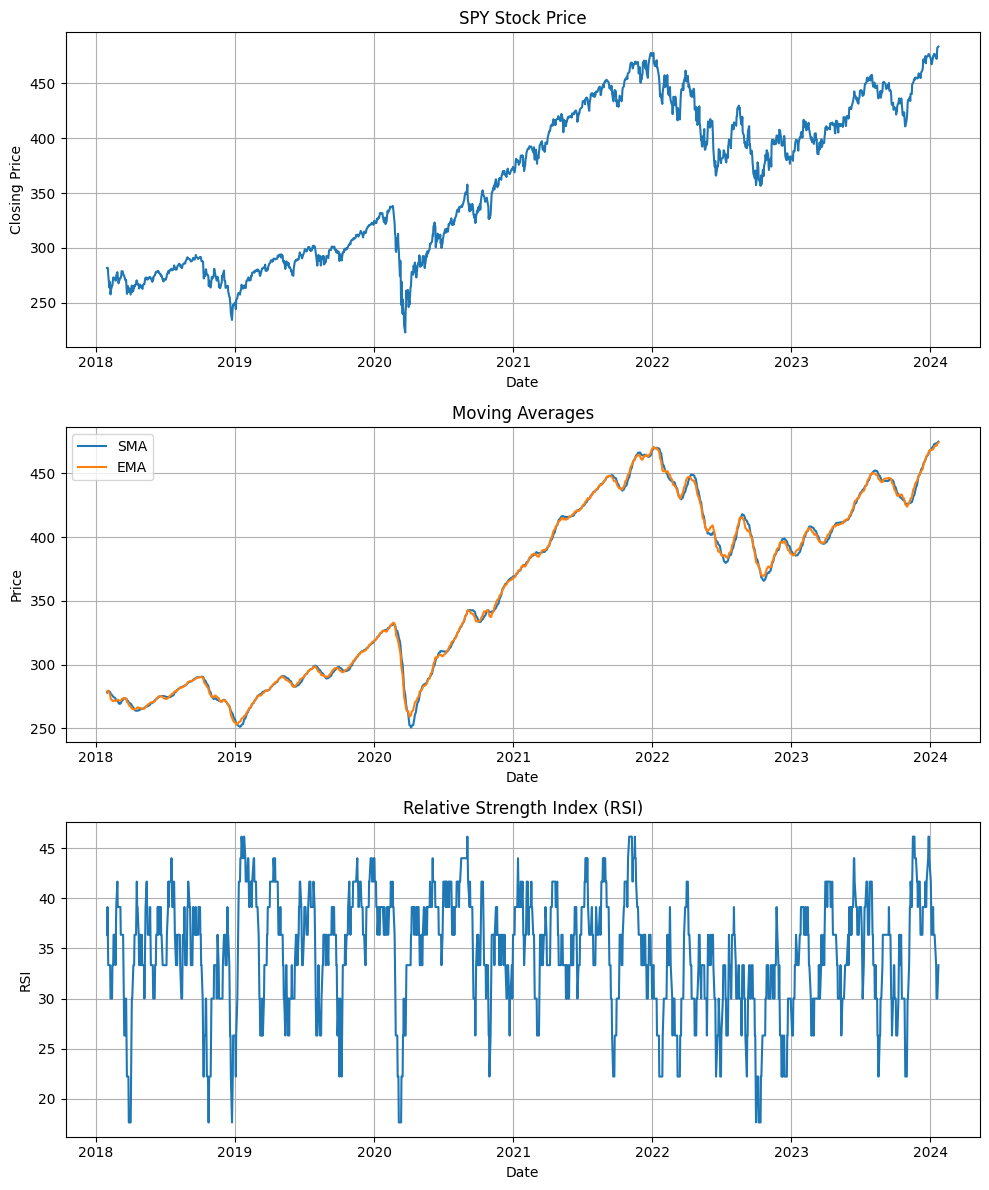

In [3]:
import pandas as pd

# Calculate technical indicators
data["SMA"] = data["Close"].rolling(window=20).mean()
data["EMA"] = data["Close"].ewm(span=20, adjust=False).mean()
data["RSI"] = 100 - (100 / (1 + (data["Close"].diff() > 0).rolling(window=14).mean()))
data["MACD"] = data["Close"].ewm(span=12, adjust=False).mean() - data["Close"].ewm(span=26, adjust=False).mean()
data["VIX"] = yf.download("^VIX", start=start_date, end=end_date)["Close"]

# Drop missing values
data.dropna(inplace=True)

# Plotting the technical indicators
plt.figure(figsize=(10, 12))

plt.subplot(3, 1, 1)
plt.plot(data["Close"])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{ticker} Stock Price")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(data["SMA"], label="SMA")
plt.plot(data["EMA"], label="EMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Moving Averages")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(data["RSI"])
plt.xlabel("Date")
plt.ylabel("RSI")
plt.title("Relative Strength Index (RSI)")
plt.grid(True)

plt.tight_layout()

plt.show()

In [5]:
# Create feature matrix and target variable
features = ["SMA", "EMA", "RSI", "MACD", "VIX"]
target = "Close"

X = data[features]
y = data[target]

# Splitting the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [6]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Creating the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Setting the hyperparameters
params = {
    "objective": "reg:squarederror",
    "max_depth": 3,
    "learning_rate": 0.1,
    "gamma": 0,
    "reg_lambda": 1,
    "eval_metric": "rmse"
}

# Training the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Making predictions
y_pred_train = model.predict(dtrain)
y_pred_test = model.predict(dtest)

# Calculating the root mean squared error
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")

Train RMSE: 3.15
Test RMSE: 5.78
